# 1.Import libraries and objects

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import sklearn as sk
from matplotlib.backends.backend_pdf import PdfPages
import re
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import time
import math
from math import sqrt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. Functions

## 2.1 Load data

In [2]:
def load(handel,old_handel):
    dfe=pd.read_csv(handel,index_col=None)
    df1=pd.read_csv(r"C:\Users\mamr4\OneDrive\Documents\Master thesis\Data\peridic.csv",index_col=None)
    dfe= dfe.loc[:, ~dfe.columns.str.contains('^Unnamed')]
    nul=[np.NaN]*len(dfe.Molecule)
    for char in ['e1','e2']:
        dfe[char]=nul
    for char in df1.Symbol:
        ind1=dfe.loc[dfe['Molecule'].str.contains(r'^'+char+r'\D')].index.values
        ind2=dfe.loc[dfe['Molecule'].str.contains(char+r'$')].index.values
        ind3=dfe.loc[dfe['Molecule'].str.contains(r'^'+char+r'2')].index.values
        #print(char)
        #print(df1[df1.Symbol==char].Period.values)
        dfe.loc[ind1,'e1']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind2,'e2']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind3,'e1']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind3,'e2']=df1[df1.Symbol==char].NumberofElectrons.values[0]
    g=dfe
    g['n1']=g.A1-g.e1
    g['n2']=g.A2-g.e2
    g.loc[g.atom2=='H','p2']=[1]*len(g.loc[g.atom2=='H']['p2'])
    g.loc[g.atom1=='H','p1']=[1]*len(g.loc[g.atom1=='H']['p1'])
    g.loc[g.atom2=='H','g2_lan_act']=[1]*len(g.loc[g.atom2=='H']['g2_lan_act'])
    g.loc[g.atom1=='H','g1_lan_act']=[1]*len(g.loc[g.atom1=='H']['g1_lan_act'])
    
    
    
    g.loc[g.atom2=='D','p2']=[1]*len(g.loc[g.atom2=='D']['p2'])
    g.loc[g.atom1=='D','p1']=[1]*len(g.loc[g.atom1=='D']['p1'])
    g.loc[g.atom2=='T','p2']=[1]*len(g.loc[g.atom2=='T']['p2'])
    g.loc[g.atom1=='T','p1']=[1]*len(g.loc[g.atom1=='T']['p1'])
    g.loc[g.atom2=='D','g2']=[1]*len(g.loc[g.atom2=='D']['g2'])
    g.loc[g.atom1=='D','g1']=[1]*len(g.loc[g.atom1=='D']['g1'])
    g.loc[g.atom2=='T','g2']=[1]*len(g.loc[g.atom2=='T']['g2'])
    g.loc[g.atom1=='T','g1']=[1]*len(g.loc[g.atom1=='T']['g1'])
    g.loc[g.atom2=='D','g2_lan_act']=[1]*len(g.loc[g.atom2=='D']['g2_lan_act'])
    g.loc[g.atom1=='D','g1_lan_act']=[1]*len(g.loc[g.atom1=='D']['g1_lan_act'])
    g.loc[g.atom2=='T','g2_lan_act']=[1]*len(g.loc[g.atom2=='T']['g2_lan_act'])
    g.loc[g.atom1=='T','g1_lan_act']=[1]*len(g.loc[g.atom1=='T']['g1_lan_act'])
    g.loc[g.atom2=='D','g2_lan_act_iso']=[0]*len(g.loc[g.atom2=='D']['g2_lan_act_iso'])
    g.loc[g.atom1=='D','g1_lan_act_iso']=[0]*len(g.loc[g.atom1=='D']['g1_lan_act_iso'])
    g.loc[g.atom2=='T','g2_lan_act_iso']=[-1]*len(g.loc[g.atom2=='T']['g2_lan_act_iso'])
    g.loc[g.atom1=='T','g1_lan_act_iso']=[-1]*len(g.loc[g.atom1=='T']['g1_lan_act_iso'])
    g.loc[g.atom2=='H','g2_lan_act_iso']=[1]*len(g.loc[g.atom2=='H']['g2_lan_act_iso'])
    g.loc[g.atom1=='H','g1_lan_act_iso']=[1]*len(g.loc[g.atom1=='H']['g1_lan_act_iso'])
    g['sum_p']=g['p1']+g['p2']
    g['sum_g']=g.g1_lan_act+g.g2_lan_act
    g['diff_p']=abs(g['p1']-g['p2'])
    g['diff_g']=abs(g['g1_lan_act']-g['g2_lan_act'])
    g['product_p']=g['p1']*g['p2']
    g['product_g']=g['g1_lan_act']*g['g1_lan_act']
    g['Reduced_g']=(g.g1_lan_act*g.g2_lan_act)/(g.g1_lan_act+g.g2_lan_act)
    g['Reduced_p']=(g.p1*g.p2)/(g.p1+g.p2)
    g['g_average']=(g.g1+g.g2)/2
    g['g_average_lan_act']=(g.g1_lan_act+g.g2_lan_act)/2
    g['g_average_lan_act_iso']=(g.g1_lan_act_iso+g.g2_lan_act_iso)/2
    g['Re (\AA)^-1']=1/((g['Re (\AA)']))
    g['Re (au)']=((g['Re (\AA)'])*1.8897259885789)
    g['Re (au)^-1']=1/((g['Re (\AA)'])*1.8897259885789)
    g['Re (au)^2']=((g['Re (\AA)'])*1.8897259885789)**2
    g['Re (au)^-2']=1/g['Re (au)^2']
    g['4*(np.pi**2)*Re (au)']=(4*(np.pi**2)*(g['Re (\AA)'])*1.8897259885789)
    g['4*(np.pi**2)*Re (au)^-1']=1/(4*(np.pi**2)*(g['Re (\AA)'])*1.8897259885789)
    g['omega_e (au)^-2']=1/((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['4*(np.pi**2)*omega_e (au)^-2']=1/((2*(np.pi)*g['omega_e (cm^{-1})']*0.0000046)**2)
    g['omega_e (au)']=(g['omega_e (cm^{-1})']*(0.0000046))
    g['omega_e (au)^2']=((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['4*(np.pi**2)*omega_e (au)^2']=4*(np.pi**2)*((g['omega_e (cm^{-1})']*(0.0000046))**2)
    g['K']=(4*(np.pi**2)*((g['omega_e (cm^{-1})'])**2)*g['Reduced mass'])
    g['sqrt(K)']=np.sqrt(4*(np.pi**2)*((g['omega_e (cm^{-1})'])**2)*g['Reduced mass'])
    g['4*(np.pi**2)*omega_e (au)']=4*(np.pi**2)*((g['omega_e (cm^{-1})']*(0.0000046)))
    g['4*(np.pi**2)*Re (au)*omega_e (au)^2']=g['4*(np.pi**2)*Re (au)']*((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['ve1']=g['g1_lan_act']
    g['ve2']=g['g2_lan_act']
    g['log(D_e)/(R_e^3*Z_1*Z_2)']=np.log((g["D0 (eV)"]*0.037)/((g["Re (au)"]**3)*g.e1*g.e2))
    g.loc[g.g2_lan_act==18,'ve2']=[0]*len(g.loc[g.g2_lan_act==18]['g2_lan_act'])
    g.loc[g.g1_lan_act==18,'ve1']=[0]*len(g.loc[g.g1_lan_act==18]['g1_lan_act'])
    g.loc[g.g2_lan_act==17,'ve2']=[7]*len(g.loc[g.g2_lan_act==17]['g2_lan_act'])
    g.loc[g.g1_lan_act==17,'ve1']=[7]*len(g.loc[g.g1_lan_act==17]['g1_lan_act'])
    g.loc[g.g2_lan_act==16,'ve2']=[6]*len(g.loc[g.g2_lan_act==16]['g2_lan_act'])
    g.loc[g.g1_lan_act==16,'ve1']=[6]*len(g.loc[g.g1_lan_act==16]['g1_lan_act'])
    g.loc[g.g2_lan_act==15,'ve2']=[5]*len(g.loc[g.g2_lan_act==15]['g2_lan_act'])
    g.loc[g.g1_lan_act==15,'ve1']=[5]*len(g.loc[g.g1_lan_act==15]['g1_lan_act'])
    g.loc[g.g2_lan_act==14,'ve2']=[4]*len(g.loc[g.g2_lan_act==14]['g2_lan_act'])
    g.loc[g.g1_lan_act==14,'ve1']=[4]*len(g.loc[g.g1_lan_act==14]['g1_lan_act'])
    g.loc[g.g2_lan_act==13,'ve2']=[3]*len(g.loc[g.g2_lan_act==13]['g2_lan_act'])
    g.loc[g.g1_lan_act==13,'ve1']=[3]*len(g.loc[g.g1_lan_act==13]['g1_lan_act'])
    g.loc[g.type2=='Transition Metal','ve2']=[2]*len(g.loc[g.type2=='Transition Metal']['g2_lan_act'])
    g.loc[g.type1=='Transition Metal','ve1']=[2]*len(g.loc[g.type1=='Transition Metal']['g1_lan_act'])
    g= g.loc[:, ~g.columns.str.contains('^Unnamed')]
    g_dict=g.to_dict(orient='list')
    old=pd.read_excel(old_handel)
    old=old[old["Te (cm^{-1})"]==0]
    old.drop_duplicates(inplace=True)
    gr=g[g["Re (\AA)"].isna()==False]
    gw=gr[gr["omega_e (cm^{-1})"].isna()==False]
    g_new=g.loc[g['Molecule'].isin(old.Molecule)==False]
    g_old=g.loc[g['Molecule'].isin(old.Molecule)]
    gr_old=g_old[g_old["Re (\AA)"].isna()==False]
    gw_old=gr_old[gr_old["omega_e (cm^{-1})"].isna()==False]
    gr_new=g_new[g_new["Re (\AA)"].isna()==False]
    gw_new=gr_new[gr_new["omega_e (cm^{-1})"].isna()==False]
    reverse=['A1','A2','g1','g2','p1','p2','g1iso','g2iso','g1_lan_act','g2_lan_act','g1_lan_act_iso','g2_lan_act_iso','atom1','atom2','type1','type2','e1','e2','ve1','ve2']
    for key,value in g_dict.items():
        if key in reverse:
            continue 
        else:
            g_dict[key]=value+value
            #=g_dict[key].append(g_dict[key])
    s=0        
    for i in range(len(reverse)):
            if s==len(reverse):
                break
            A=g_dict[reverse[s]]+g_dict[reverse[s+1]]
            B=g_dict[reverse[s+1]]+g_dict[reverse[s]]
            g_dict[reverse[s]]=A
            g_dict[reverse[s+1]]=B
            s=s+2
    g_expand=pd.DataFrame.from_dict(g_dict, orient='columns')
    g_expand.drop_duplicates(subset=['A1','A2','g1','g2','p1','p2','g1iso','g2iso','g1_lan_act','g2_lan_act','g1_lan_act_iso','g2_lan_act_iso','atom1','atom2','type1','type2','ve1','ve2'], keep='first', inplace=True, ignore_index=False)
    gr_expand=g_expand[g_expand["Re (\AA)"].isna()==False]
    gw_expand=gr_expand[gr_expand["omega_e (cm^{-1})"].isna()==False]

    g_new_expand=g_expand.loc[g_expand['Molecule'].isin(old.Molecule)==False]
    g_old_expand=g_expand.loc[g_expand['Molecule'].isin(old.Molecule)]
    gr_old_expand=g_old_expand[g_old_expand["Re (\AA)"].isna()==False]
    gw_old_expand=gr_old_expand[gr_old_expand["omega_e (cm^{-1})"].isna()==False]
    gr_new_expand=g_new_expand[g_new_expand["Re (\AA)"].isna()==False]
    gw_new_expand=gr_new_expand[gr_new_expand["omega_e (cm^{-1})"].isna()==False]
    return g,gr,gw, g_old, g_new, gr_old, gw_old, gr_new, gw_new, g_expand, gr_expand, gw_expand, g_old_expand, g_new_expand, gr_old_expand, gw_old_expand, gr_new_expand, gw_new_expand

## 3.2 Function that perfroms the MC splits and train fit the LR and make predictions

In [19]:
def ml_model(data,strata,test_size,features,logtarget,target,n_splits=1000):
    r_y_train_preds={}
    r_y_test_preds={}
    trval={} #intiate a dictionary to store optmized kernels and scores
    start_time = time.time()
    RMSE=[]
    RMSLE=[]
    MAE=[]
    R=[]
    Train_RMSE=[]
    Train_RMSLE=[]
    Train_MAE=[]
    Train_R=[]
    train=[]
    test=[]
    mcs = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size,random_state=42)
    #skf = StratifiedKFold(n_splits=0, shuffle=True, random_state=42)
    loo = LeaveOneOut()
    #print(loo.get_n_splits(data))
    s=0

    #for train_index, test_index in loo.split(data):
    for train_index, test_index in mcs.split(data,strata):
        #print(train_index)
        re_train_set1 = data.iloc[train_index]
        re_train_set1['ind']=train_index
        re_test_set1 = data.iloc[test_index]
        re_test_set1['ind']=test_index
        print('size of training set before removing mirror molecules',len(re_train_set1))
        
        re_train_set=re_train_set1[~re_train_set1['Molecule'].isin(re_test_set1['Molecule'].tolist())]
        re_test_set=pd.concat([re_test_set1,re_train_set1[re_train_set1['Molecule'].isin(re_test_set1['Molecule'].tolist())]])
        
        for i in re_train_set['Molecule'].isin([re_test_set['Molecule']]):
            if i ==True:
                print(i)
        print('size of training set after removing mirror molecules',len(re_train_set))
        #print('size of test set after adding mirror molecules',len(re_test_set))
        train.append(re_train_set['Molecule'])
        if (re_test_set['Molecule'].tolist()) in test:
            #continue
            break

        test.append(re_test_set['Molecule'].tolist())
        #print(test)
        



        trval[str(s)]={}
        trval[str(s)]['$\sigma^2$']=1
        trval[str(s)]['length scale']=1
        trval[str(s)]['noise level']=1
      
        
        
        reg = LinearRegression().fit(re_train_set[features], re_train_set[logtarget])
        
        r_y_train_pred_log=reg.predict(re_train_set[features])
        
        r_y_test_pred_log=reg.predict(re_test_set[features])
        
        
        
        r_y_train_pred=r_y_train_pred_log
        r_y_test_pred=r_y_test_pred_log
        
        
        for m in range(len(r_y_test_pred)):
            if r_y_test_pred[m]<0:
                print('yalaaahwy')
        r_y_test_pred=(np.array(r_y_test_pred))
        for m in range(len(r_y_test_pred)):
            if r_y_test_pred[m]<0:
                print('y5rabaaaay')
                
                
        #if (100*(np.sqrt(mean_squared_error(re_test_set['Re (\AA)'],r_y_test_pred)))/((data['Re (\AA)']).max()-(data['Re (\AA)']).min())) > 3.0:
         #   print(re_test_set['Molecule'].isin(test))
          #  continue
        
        
        for  mol in  re_test_set['Molecule'].tolist():
            test.append(mol)


        RMSE.append(np.sqrt(mean_squared_error(re_test_set[target],r_y_test_pred)))

        trval[str(s)]['RMSE']=RMSE[-1]
        
        Train_RMSE.append(np.sqrt(mean_squared_error(re_train_set[target],r_y_train_pred)))

        trval[str(s)]['Train_RMSE']=Train_RMSE[-1]
        
        RMSLE.append(np.sqrt(mean_squared_error(re_test_set[logtarget],r_y_test_pred_log)))

        trval[str(s)]['RMSLE']=RMSLE[-1]
        
                
        Train_RMSLE.append(np.sqrt(mean_squared_error(re_train_set[logtarget],r_y_train_pred_log)))

        trval[str(s)]['Train_RMSLE']=Train_RMSLE[-1]

        MAE.append(sum(abs(re_test_set[target]-(r_y_test_pred)))/len(re_test_set[target]))

        trval[str(s)]['MAE']=MAE[-1]
        
        Train_MAE.append(sum(abs(re_train_set[target]-(r_y_train_pred)))/len(re_train_set[target]))

        trval[str(s)]['Train_MAE']=Train_MAE[-1]

        R.append(100*(np.sqrt(mean_squared_error(re_test_set[target],r_y_test_pred)))/((data[target]).max()-(data[target]).min()))

        trval[str(s)]['R']=R[-1]
        
        #if trval[str(s)]['R'] > 3.0:
         #   continue
            #print(re_test_set['Molecule'])

        #print("Molecule",re_test_set["Molecule"],'-------')
        #print('sigma: ',trval[str(s)]['$\sigma^2$'],"length scale: ",trval[str(s)]['length scale'],'noise level: ',trval[str(s)]['noise level'])
        
        print("Split:",s)
        #print('Molecule',re_test_set['Molecule'].tolist()[-1])
       # print('Train MAE', np.array(Train_MAE).mean(),trval[str(s)]['Train_MAE'])
        print('Test MAE', np.array(MAE).mean(),trval[str(s)]['MAE'])
        print('Test R%: ',np.array(R).mean(),trval[str(s)]['R'])
        print('Train RMSE: ',np.array(Train_RMSE).mean(),trval[str(s)]['Train_RMSE'])
        print('Test RMSE: ',np.array(RMSE).mean(),trval[str(s)]['RMSE'])
      #  print('Train RMSLE: ',np.array(Train_RMSLE).mean(),trval[str(s)]['Train_RMSLE'])
     #   print('Test RMSLE: ',np.array(RMSLE).mean(),trval[str(s)]['RMSLE'])
              
        
    
        s=s+1
        

        for i in range(len(re_train_set.ind)):
            if re_train_set.ind.tolist()[i] not in r_y_train_preds:   
                r_y_train_preds[re_train_set.ind.tolist()[i]]=[r_y_train_pred[i]]

                #print("Molecule: ",re_train_set.loc[train_index[i],'Molecule'],"true: ",gr.loc[train_index[i],'Re (\AA)'],"pred: ",r_y_train_pred[i],"standard deviation: ",r_std_train[i])

            else:
                r_y_train_preds[re_train_set.ind.tolist()[i]].append(r_y_train_pred[i])
                
        for i in range(len(re_test_set.ind)):
            if re_test_set.ind.tolist()[i] not in r_y_test_preds:
                r_y_test_preds[re_test_set.ind.tolist()[i]]=[r_y_test_pred[i]]
            else:
                r_y_test_preds[re_test_set.ind.tolist()[i]].append(r_y_test_pred[i])
    end_time = time.time()
    retime=end_time-start_time
    retime
    return trval,train,test,Train_MAE,Train_RMSE,Train_R,Train_RMSLE,MAE,RMSE,R,RMSLE,r_y_train_preds,r_y_test_preds

## 3.4 Ploting Function

In [20]:
def plot_results(df,x,y,target,r_y_train_preds,r_y_test_preds):
    re_train_preds=[]
    re_test_preds=[]
    out=[]
    for index in range(len(df.index)):
            re_train_preds.append(np.array(r_y_train_preds[index]).mean())
            re_test_preds.append((np.array(r_y_test_preds[index])).mean())
    fig, ax =pyplot.subplots(figsize=(7,7))
    pyplot.xticks(fontsize=16)
    pyplot.yticks(fontsize=16)
    #ax.set_xlim(0, df[target].max())
    ax.errorbar(df[target], re_train_preds, fmt ='o',label='Training set')
    ax.errorbar(df[target], re_test_preds, fmt ='o',label='Validation set')

    line=df[target].tolist()
    line.append(0)
    line.append(np.ceil(np.array(re_test_preds).max()))
    ax.plot(line,line,'--k')
    pyplot.xticks(ticks=np.linspace(1, 4, num=4))
    pyplot.yticks(ticks=np.linspace(1, 4, num=4))
    #ax.plot([0, 1], [0, 1], transform=ax.transAxes)
    pyplot.xlim(np.array(line).min(),np.ceil(np.array(line).max()))
    pyplot.ylim(np.array(line).min(),np.ceil(np.array(line).max()))
    ax.legend(prop={'size': 18})
    pyplot.xlabel(x,fontdict={'size': 16})
    pyplot.ylabel(y,fontdict={'size': 16})
    return re_train_preds,re_test_preds,out,fig,ax

In [21]:
def results(data_describtion,df,target,re_test_preds,no_molecules,MAE,RMSE,R,handle):
    results={}
    results[data_describtion]={}
    results[data_describtion]['Number of molecules in the whole data set']=no_molecules
    results[data_describtion]['MAE']=str(np.array(MAE).mean())
    results[data_describtion]['RMSE']=str(np.array(RMSE).mean())
    results[data_describtion]['$r%$']=str((np.array(R).mean()))
    results=pd.DataFrame.from_dict(results) 
    results.to_csv(handle, index=True)  
    return results

# 3. Body

## 3.1 Loading and organizing data

In [22]:
g,gr,gw, g_old, g_new, gr_old, gw_old, gr_new, gw_new, g_expand, gr_expand, gw_expand, g_old_expand, g_new_expand, gr_old_expand, gw_old_expand, gr_new_expand, gw_new_expand=load(handel=r"C:\Users\mamr4\OneDrive - Stony Brook University\Master thesis\Data\g.csv",old_handel=r"C:\Users\mamr4\OneDrive\Documents\Master thesis\Data\list of molecules used in Xiangue and Jesus paper.xlsx")

C:\Users\mamr4\AppData\Local\Temp\ipykernel_38240\658485013.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfe=pd.read_csv(handel,index_col=None)


### 3.1.1 Stratify

In [23]:
gw_expand=gw
gw_expand=gw_expand[~gw_expand['Molecule'].isin(['XeCl','AgBi','Hg2','HgCl'])]
gw_expand['wcat']=gw_expand['Re (\AA)']
#gw_expand=gw_expand.drop_duplicates(subset=['p1','p2','g1_lan_act','g2_lan_act'],ignore_index=True)
#np.sqrt(gw_expand['Reduced mass']**2+gw_expand['p1']**2+gw_expand['p2']**2+gw_expand['g1_lan_act']**2+gw_expand['g2_lan_act']**2)
gw_expand_unique=np.unique(gw_expand['wcat'])
ind=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,302]
print(len(gw_expand_unique))
for i in range(len(ind)-1):
    gw_expand['wcat'].where((gw_expand['wcat']>gw_expand_unique[ind[i+1]])|(gw_expand['wcat']<=gw_expand_unique[ind[i]]),gw_expand_unique[ind[i]],inplace=True)
np.unique(gw_expand['wcat'],return_counts=True)
#len(np.unique(gw_expand['wcat']))

303


(array([0.7414  , 1.03621 , 1.2324  , 1.342   , 1.4756  , 1.5239  ,
        1.5874  , 1.6092  , 1.624648, 1.66826 , 1.723071, 1.7436  ,
        1.7839  , 1.8257  , 1.8882  , 1.91983 , 1.967   , 2.0174  ,
        2.0605  , 2.1449  , 2.1991  , 2.2425  , 2.3194  , 2.36    ,
        2.406   , 2.502038, 2.59    , 2.786736, 3.07887 , 3.74    ]),
 array([13, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12], dtype=int64))

In [24]:
gw_expand['ln(e1*e2)']=np.log(gw_expand['e1']*gw_expand['e2'])
gw_expand['mu^(1/2)']=(np.sqrt(gw_expand['Reduced mass']))
gw_expand['ln(mu^(1/2))']=np.log(np.sqrt(gw_expand['Reduced mass']))
gw_expand['ln(w)']=np.log(gw_expand['omega_e (cm^{-1})'])

In [25]:
trval,train,test,Train_MAE,Train_RMSE,Train_R,Train_RMSLE,MAE,RMSE,R,RMSLE,r_y_train_preds,r_y_test_preds=ml_model(data=gw_expand,strata=gw_expand['wcat'],test_size=31,features=['sum_p','sum_g','ln(e1*e2)'],target='Re (\AA)',logtarget='Re (\AA)',n_splits=1000)

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 0
Test MAE 0.2393809070850637 0.2393809070850637
Test R%:  9.555299642572772 9.555299642572772
Train RMSE:  0.4489897654181384 0.4489897654181384
Test RMSE:  0.35627890247296834 0.35627890247296834
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 1
Test MAE 0.24603524732129867 0.2526895875575336
Test R%:  10.928867737482651 12.302435832392531
Train RMSE:  0.44362846886236157 0.43826717230658474
Test RMSE:  0.4074937624597781 0.4587086224465879
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 2
Test MAE 0.26648840672676827 0.3073947255377075
Test R%:  11.53193046077309 12.738055907353965
Train RMSE:  0.4411409702943008 0.4361659731581794
Test RMSE:  0.4299795591603854 0.4749511525615999
size of training set before removing 

Split: 26
Test MAE 0.2778895378942171 0.27054967880303477
Test R%:  11.565163775921027 11.729340228518168
Train RMSE:  0.44057301596319753 0.44073118589252536
Test RMSE:  0.43121869654899136 0.4373401797605284
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 27
Test MAE 0.2773095253489903 0.26164918662786557
Test R%:  11.517726243512433 10.236912868480408
Train RMSE:  0.4407926950743333 0.4467240310749978
Test RMSE:  0.42944994071560455 0.38169353321416044
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 28
Test MAE 0.2770601005364266 0.2700762057846444
Test R%:  11.50788950280624 11.232460763032833
Train RMSE:  0.4408541964674971 0.4425762354760843
Test RMSE:  0.4290831680016335 0.4188135320104422
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 29
Test MAE 0.2758485089

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 54
Test MAE 0.2663449385334522 0.2270809322157789
Test R%:  11.253868888670544 11.082456555196808
Train RMSE:  0.44176924194274986 0.44319608604981175
Test RMSE:  0.4196117553829698 0.41322047511706816
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 55
Test MAE 0.2665472169207745 0.2776725282234995
Test R%:  11.269727400689545 12.141945561734794
Train RMSE:  0.44171549051284104 0.43875916186785907
Test RMSE:  0.4202030558621104 0.4527245822148435
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 56
Test MAE 0.266156332647371 0.24426681333677602
Test R%:  11.259311860955712 10.676041635861154
Train RMSE:  0.44176854903437657 0.44473982624036595
Test RMSE:  0.41981470204759475 0.39806688843471894
size of training set before 

size of training set after removing mirror molecules 276
Split: 80
Test MAE 0.2648341233323418 0.29557358117273935
Test R%:  11.257923611517471 10.62115530785798
Train RMSE:  0.44188232427063456 0.44557617469652566
Test RMSE:  0.4197629397790405 0.39602039680879264
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 81
Test MAE 0.26470116328615284 0.2539313995448476
Test R%:  11.261584772842724 11.558138840188258
Train RMSE:  0.44187473475037586 0.44125998360942115
Test RMSE:  0.41989944984021393 0.43095676479525935
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 82
Test MAE 0.26512222805671987 0.29964953924321547
Test R%:  11.283892081080634 13.113091356589205
Train RMSE:  0.44178604412976163 0.4345134132393931
Test RMSE:  0.4207312001351727 0.48893472432178503
size of training set before removing mirror molecules 276
size of training set afte

Split: 106
Test MAE 0.265166021904989 0.2618714787238077
Test R%:  11.307630395914995 9.605404331855155
Train RMSE:  0.44167826607155347 0.44880722709381354
Test RMSE:  0.42161630694208646 0.3581471059175513
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 107
Test MAE 0.26498946763614367 0.24609816086969472
Test R%:  11.28198023411157 8.537412921144973
Train RMSE:  0.4417736916319311 0.45198422659233434
Test RMSE:  0.4206599150090839 0.31832597817781144
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 108
Test MAE 0.26501513627265416 0.2677873490157819
Test R%:  11.285072791058472 11.61906894132413
Train RMSE:  0.44176712024447223 0.44105741039891494
Test RMSE:  0.42077522408740614 0.4332286045462115
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 109
Test MAE 0.265138

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 135
Test MAE 0.2650343034108401 0.2897241427440329
Test R%:  11.341311123851169 12.865636253000398
Train RMSE:  0.44153907033705836 0.4355472581278096
Test RMSE:  0.4228721265639146 0.4797081133293728
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 136
Test MAE 0.2649941681346684 0.25953577057531985
Test R%:  11.322368208471383 8.746131716820685
Train RMSE:  0.4416109821176564 0.45139098427899704
Test RMSE:  0.422165821021064 0.326108267193376
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 137
Test MAE 0.26520714072540974 0.294384385656966
Test R%:  11.32983589115925 12.35290841939699
Train RMSE:  0.44158410065866266 0.4379013407765128
Test RMSE:  0.4224442610377638 0.46059054332563615
size of training set before removi

Split: 160
Test MAE 0.2651889997152512 0.24549045587096036
Test R%:  11.33485304471535 10.806886572088512
Train RMSE:  0.4416037123572262 0.44415607765766885
Test RMSE:  0.42263133062525654 0.40294557272689224
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 161
Test MAE 0.2652067437028198 0.26806352570137365
Test R%:  11.339094144227708 12.021911165717267
Train RMSE:  0.4415893310558941 0.4392739415414383
Test RMSE:  0.4227894642616743 0.448248979724934
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 162
Test MAE 0.26568691195811467 0.3434741693158797
Test R%:  11.364688791239631 15.511021607171218
Train RMSE:  0.4414723758362696 0.4225256302570964
Test RMSE:  0.42374378627016085 0.578343951644986
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 163
Test MAE 0.26543692

Split: 188
Test MAE 0.26546689081522906 0.27123441003963816
Test R%:  11.335969375761906 11.965399294107204
Train RMSE:  0.441566954198888 0.43968268081262907
Test RMSE:  0.4226729541446584 0.44614187808008116
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 189
Test MAE 0.26540350484333325 0.2534235561550313
Test R%:  11.339018743424557 11.915349231665505
Train RMSE:  0.44155718558634155 0.43971091781506366
Test RMSE:  0.4227866528673281 0.44427571145187994
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 190
Test MAE 0.2654130075584384 0.2672185234284076
Test R%:  11.343772083406959 12.246906680063429
Train RMSE:  0.4415408555158853 0.4384381421292018
Test RMSE:  0.4229638859019119 0.45663816247284494
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 191
Test MAE 0.2652

size of training set after removing mirror molecules 276
Split: 218
Test MAE 0.2651547463348812 0.2491524149688878
Test R%:  11.346986985082264 9.320500449637876
Train RMSE:  0.44153509927838014 0.4505457090883707
Test RMSE:  0.42308375672577725 0.3475241797651978
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 219
Test MAE 0.2649016260550919 0.20946828478124205
Test R%:  11.331889262047653 8.025487917468354
Train RMSE:  0.4415892902050668 0.45345710314944576
Test RMSE:  0.42252082302470884 0.299238342490725
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 220
Test MAE 0.26516711019903527 0.32357362186658734
Test R%:  11.338264816539331 12.740886804708023
Train RMSE:  0.44156429156487875 0.436064590723497
Test RMSE:  0.4227585419494854 0.47505670540034334
size of training set before removing mirror molecules 276
size of training set after re

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 249
Test MAE 0.2657716299455526 0.27158946012715235
Test R%:  11.364513800693633 11.525639288749366
Train RMSE:  0.44146424030223763 0.44188185410092673
Test RMSE:  0.42373726157266267 0.42974498652030885
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 250
Test MAE 0.26574294464973885 0.2585716206962897
Test R%:  11.356523096009438 9.358846924961156
Train RMSE:  0.4414980087615295 0.44994012358450614
Test RMSE:  0.42343932015780783 0.3489539664441016
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 251
Test MAE 0.2656439305582191 0.2407913935867761
Test R%:  11.35593566638741 11.20849083125846
Train RMSE:  0.4415029020041445 0.4427311059004994
Test RMSE:  0.42341741725692095 0.41791978913430294
size of training set before

size of training set after removing mirror molecules 276
Split: 278
Test MAE 0.26646279933649614 0.2937648863197585
Test R%:  11.348673318130803 12.46512499545141
Train RMSE:  0.4415491500904917 0.4373829614206629
Test RMSE:  0.42314663333982505 0.46477465058040124
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 279
Test MAE 0.2665274683849296 0.28457013289785826
Test R%:  11.349411831382707 11.555457028663513
Train RMSE:  0.4415482953446264 0.44130982124817775
Test RMSE:  0.42317416954493553 0.4308567707707477
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 280
Test MAE 0.26648763174961604 0.25533337386181704
Test R%:  11.348891829871915 11.203291406850626
Train RMSE:  0.4415521594940298 0.4426341213269976
Test RMSE:  0.4231547807686042 0.4177259233958324
size of training set before removing mirror molecules 276
size of training set after 

Split: 308
Test MAE 0.2666863423225831 0.2659439826710402
Test R%:  11.351448860476108 12.293545959004723
Train RMSE:  0.44155570410611833 0.4386554792993862
Test RMSE:  0.4232501222117121 0.45837715462745005
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 309
Test MAE 0.266436970365395 0.18938103559428163
Test R%:  11.338316055331589 7.2802792656750315
Train RMSE:  0.4416000795745973 0.4553120993346118
Test RMSE:  0.4227604524390936 0.2714524926999592
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 310
Test MAE 0.26651735221709655 0.29143572624458397
Test R%:  11.340082162971328 11.887575531290878
Train RMSE:  0.44159577313937387 0.44026077822009774
Test RMSE:  0.42282630352854894 0.4432401412597116
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 311
Test MAE 0.26682

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 339
Test MAE 0.2659353252067142 0.2715778099561316
Test R%:  11.315134971298711 14.36373186287563
Train RMSE:  0.4416789169197279 0.4286479561613882
Test RMSE:  0.42189612253984377 0.5355661062391807
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 340
Test MAE 0.2657353844623504 0.19775553137865393
Test R%:  11.304100772536943 7.552473193535866
Train RMSE:  0.44171688381572355 0.45462562845428134
Test RMSE:  0.4214847014048125 0.2816015154941783
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 341
Test MAE 0.26585230423258666 0.30572194588315543
Test R%:  11.308149855466224 12.6888871343507
Train RMSE:  0.4417010747392684 0.4363101796680429
Test RMSE:  0.4216356755109136 0.4731178456914002
size of training set before remo

size of training set after removing mirror molecules 276
Split: 368
Test MAE 0.26587474701695224 0.2434292627276541
Test R%:  11.293685473473273 9.43603696409589
Train RMSE:  0.4417566041663384 0.4492920665009247
Test RMSE:  0.4210963565639244 0.35183207424327934
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 369
Test MAE 0.2658503186092271 0.25683623615863527
Test R%:  11.28992140685519 9.9009808247822
Train RMSE:  0.4417732372525666 0.4479108460707523
Test RMSE:  0.42095600957600254 0.3691679710328291
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 370
Test MAE 0.26597370349664107 0.3116261118398195
Test R%:  11.293779469194796 12.721262534849112
Train RMSE:  0.4417588436246657 0.4364332013013421
Test RMSE:  0.4210998612883971 0.47432499487438395
size of training set before removing mirror molecules 276
size of training set after removin

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 398
Test MAE 0.26554598477425223 0.25931097945633924
Test R%:  11.25850151323653 11.51136878941504
Train RMSE:  0.44190851491520583 0.4414133681709098
Test RMSE:  0.4197844874225372 0.42921289668212914
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 399
Test MAE 0.26538530437179025 0.20127382378948425
Test R%:  11.249289598197736 7.573735497718923
Train RMSE:  0.4419407309418667 0.45479492557957546
Test RMSE:  0.4194410119584008 0.2823943017679477
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 400
Test MAE 0.26537131609496484 0.25977600536478795
Test R%:  11.254913780264813 13.504586607095943
Train RMSE:  0.44191760265108937 0.43266628634017523
Test RMSE:  0.41965071521095376 0.5035320162321792
size of training set befo

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 429
Test MAE 0.2649222404186786 0.29632966559091706
Test R%:  11.24512477162824 14.142672625292711
Train RMSE:  0.4419577110177357 0.43000183695753064
Test RMSE:  0.4192857222349305 0.527323691506664
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 430
Test MAE 0.26489404400490907 0.2527695860839998
Test R%:  11.245582824298232 11.442545472395045
Train RMSE:  0.44195739130230305 0.4418199136662387
Test RMSE:  0.4193028011867838 0.42664675048372164
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 431
Test MAE 0.2649156704699195 0.2742366768894042
Test R%:  11.246812368312144 11.776745838307942
Train RMSE:  0.4419537961747461 0.4404042961977319
Test RMSE:  0.4193486459648865 0.43910774532714986
size of training set before re

size of training set after removing mirror molecules 276
Split: 457
Test MAE 0.26575052900112134 0.2461662833786128
Test R%:  11.296207715620323 9.822937294415729
Train RMSE:  0.4417434258581112 0.4482894811749761
Test RMSE:  0.42119040088461923 0.36625803995958484
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 458
Test MAE 0.2657688632305604 0.2741659403136581
Test R%:  11.299313601727546 12.721809438836836
Train RMSE:  0.4417322593806206 0.43661801268992406
Test RMSE:  0.4213062069540132 0.4743453867364702
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 459
Test MAE 0.26584121478128364 0.29905057656322226
Test R%:  11.301295178241114 12.21083879796878
Train RMSE:  0.44172551893228285 0.4386316531452209
Test RMSE:  0.42138009201589816 0.45529333542106387
size of training set before removing mirror molecules 276
size of training set after 

Split: 486
Test MAE 0.26563874654088293 0.2800396382545836
Test R%:  11.30091095079498 9.81102556661293
Train RMSE:  0.4416975561354573 0.44789181255664956
Test RMSE:  0.42136576571134154 0.36581389927672964
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 487
Test MAE 0.26555569894161857 0.22511151809989371
Test R%:  11.300900469047077 11.295795857818769
Train RMSE:  0.4416993276909385 0.4425620752102792
Test RMSE:  0.4213653748888893 0.4211750443546306
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 488
Test MAE 0.26550587547362253 0.24119202309152524
Test R%:  11.300836839285898 11.269785515830305
Train RMSE:  0.4417011640851513 0.4425973244609861
Test RMSE:  0.42136300238961394 0.4202052227432488
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 489
Test MAE 0.265420

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 516
Test MAE 0.2650297066761926 0.222381750817851
Test R%:  11.28738265887614 8.405199525182041
Train RMSE:  0.4417383904244342 0.4524404315481879
Test RMSE:  0.4208613498188557 0.3133962694959376
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 517
Test MAE 0.2649452223986479 0.2212668509080346
Test R%:  11.283119738355406 9.07918982913611
Train RMSE:  0.44175600069240983 0.45086050923582094
Test RMSE:  0.42070240256431957 0.33852667196916897
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 518
Test MAE 0.26492924289857045 0.25665186185846145
Test R%:  11.282196171509074 10.803788545108866
Train RMSE:  0.44176084298366697 0.44426914985487626
Test RMSE:  0.42066796645088733 0.4028300596929291
size of training set before re

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 545
Test MAE 0.26505478461249726 0.19072424513625683
Test R%:  11.294554530298392 10.781236377395242
Train RMSE:  0.4417123236791748 0.44437829007201973
Test RMSE:  0.4211287602167058 0.401989179567559
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 546
Test MAE 0.26507230225526046 0.27463693520397103
Test R%:  11.29466832994736 11.356802938284671
Train RMSE:  0.44171297019899947 0.442065970023296
Test RMSE:  0.42113300335041726 0.4234497543568822
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 547
Test MAE 0.2650912646668482 0.2754637038053115
Test R%:  11.292569070005136 10.14427388160788
Train RMSE:  0.44172283079463354 0.4471165766064638
Test RMSE:  0.4210547303442115 0.37823939594963135
size of training set before r

Split: 574
Test MAE 0.26485087473780494 0.28512876602929493
Test R%:  11.286473525866056 12.336698812716234
Train RMSE:  0.44173484536245455 0.4379498909554955
Test RMSE:  0.4208274518854417 0.4599861519309375
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 575
Test MAE 0.2648809178729754 0.2821557205959587
Test R%:  11.289547739777474 13.05722073884359
Train RMSE:  0.4417231101695316 0.43497537423880706
Test RMSE:  0.4209420770253429 0.48685153246852203
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 576
Test MAE 0.26489122287597633 0.27082690460451825
Test R%:  11.29107212018086 12.169115232530938
Train RMSE:  0.4417178326784906 0.43867799783888306
Test RMSE:  0.42099891507306353 0.4537376305601485
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 577
Test MAE 0.26483

Split: 600
Test MAE 0.2646349260397072 0.22296916760261118
Test R%:  11.27935087591936 11.438829009242824
Train RMSE:  0.4417626305115054 0.44220534810169376
Test RMSE:  0.42056187675952916 0.4265081784386279
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 601
Test MAE 0.2646909066900668 0.2983352775561845
Test R%:  11.282231204878265 13.013308909181845
Train RMSE:  0.4417513527807206 0.4349734365790915
Test RMSE:  0.420669272705091 0.4852142359877542
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 602
Test MAE 0.26461821821754733 0.2208597577608367
Test R%:  11.2766090323621 7.892061177630722
Train RMSE:  0.4417715221158925 0.4539134618893507
Test RMSE:  0.42045964438065325 0.29426339306913907
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 603
Test MAE 0.26460975554

size of training set after removing mirror molecules 276
Split: 629
Test MAE 0.2644636420463276 0.26766109227690354
Test R%:  11.257503234638676 11.754514563833741
Train RMSE:  0.44185162419264795 0.44044705206603735
Test RMSE:  0.4197472656067376 0.4382788300271049
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 630
Test MAE 0.2645337385559828 0.30869453963877724
Test R%:  11.25735818507504 11.165976959984196
Train RMSE:  0.4418540046874445 0.44335371640930127
Test RMSE:  0.4197418572887078 0.41633461692997065
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 631
Test MAE 0.2645682253424716 0.286329387616891
Test R%:  11.259242151103566 12.448024715103408
Train RMSE:  0.4418474080563649 0.43768493384515955
Test RMSE:  0.4198121028460475 0.46413704952734564
size of training set before removing mirror molecules 276
size of training set after r

size of training set after removing mirror molecules 276
Split: 658
Test MAE 0.264604596000095 0.23203130258762025
Test R%:  11.264107079805564 8.549500964758778
Train RMSE:  0.4418241536387732 0.45185838891378494
Test RMSE:  0.41999349657763024 0.31877669297199573
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 659
Test MAE 0.2646838271794586 0.31689717438005605
Test R%:  11.269830073194537 15.04128271652789
Train RMSE:  0.44179914072032267 0.4253156274614588
Test RMSE:  0.4202068841091315 0.5608292673684588
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 660
Test MAE 0.2647453114581064 0.30532493536567723
Test R%:  11.271286424693269 12.232478413856374
Train RMSE:  0.4417941322229815 0.43848852397780164
Test RMSE:  0.4202611856311132 0.4561001901390487
size of training set before removing mirror molecules 276
size of training set after re

Split: 687
Test MAE 0.2643553402668993 0.23804441603928783
Test R%:  11.256852463773733 8.514974885042383
Train RMSE:  0.4418490390955231 0.45221994653136566
Test RMSE:  0.41972300096426735 0.3174893535636903
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 688
Test MAE 0.2643884049604975 0.2871369141560417
Test R%:  11.261981735239162 14.790920503455741
Train RMSE:  0.4418267420641029 0.42648638444703096
Test RMSE:  0.41991425098012736 0.5514942618918507
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 689
Test MAE 0.2643862382908941 0.2628934029341698
Test R%:  11.262812944100666 11.83551584967638
Train RMSE:  0.4418242262475345 0.4400908286319405
Test RMSE:  0.4199452434337374 0.4412990439710335
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 690
Test MAE 0.264415340

size of training set after removing mirror molecules 276
Split: 717
Test MAE 0.2642704137454751 0.19910837694429454
Test R%:  11.251236071244096 7.108477843345468
Train RMSE:  0.44186441985995406 0.4558118857975698
Test RMSE:  0.41951358815240725 0.26504670486697907
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 718
Test MAE 0.26425582510052814 0.25378117802860684
Test R%:  11.248329272764172 9.161247964179633
Train RMSE:  0.44187600271241345 0.450192490778222
Test RMSE:  0.4194052052642849 0.3415862915924018
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 719
Test MAE 0.2642417286996133 0.25410641644186216
Test R%:  11.249951010692714 12.415980581313645
Train RMSE:  0.4418705475527673 0.4379482877671748
Test RMSE:  0.41946567338468854 0.46294225195486055
size of training set before removing mirror molecules 276
size of training set after 

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 745
Test MAE 0.26432400584719745 0.3026661142896874
Test R%:  11.262704795358495 12.47123276534448
Train RMSE:  0.44181539148215265 0.43802649354402895
Test RMSE:  0.41994121099973675 0.4650023848886342
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 746
Test MAE 0.264332026812996 0.27031566729867845
Test R%:  11.264212409807318 12.388892788629372
Train RMSE:  0.4418102258299249 0.43795664926797745
Test RMSE:  0.4199974239120757 0.4619322565168347
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 747
Test MAE 0.2642684219750109 0.21675560800014038
Test R%:  11.263191274440759 10.50040315562256
Train RMSE:  0.44181499817246916 0.445379938053111
Test RMSE:  0.4199593498587981 0.39151803206054275
size of training set before r

Test RMSE:  0.42016824402241976 0.4555066801285853
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 773
Test MAE 0.26423938946496445 0.22683328698797223
Test R%:  11.266710465525886 9.656326178472082
Train RMSE:  0.44178913253016505 0.44875152561717524
Test RMSE:  0.4200905664175982 0.36004577789050995
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 774
Test MAE 0.26425529261719555 0.2765643324440641
Test R%:  11.26803068439073 12.28988008578054
Train RMSE:  0.4417843445381659 0.4380784387308306
Test RMSE:  0.4201397920981928 0.4582404688784132
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 775
Test MAE 0.2642151745006826 0.23312363420314564
Test R%:  11.268890899486905 11.935557599022697
Train RMSE:  0.4417819106971587 0.43989568391654754
Test RMSE:  0.42017186607826

Split: 803
Test MAE 0.2646905289211024 0.2766282325649684
Test R%:  11.303809041985915 10.893490927296304
Train RMSE:  0.44164388459281634 0.4448330712535751
Test RMSE:  0.42147382393948674 0.4061747027151699
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 804
Test MAE 0.2646959712264181 0.2690715847002504
Test R%:  11.305205786939844 12.428188729899183
Train RMSE:  0.4416391470571864 0.4378301684107363
Test RMSE:  0.42152590297183895 0.4633974449830209
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 805
Test MAE 0.2647319992944266 0.2937345940412794
Test R%:  11.305880558504422 11.84907166798933
Train RMSE:  0.44163724082571615 0.44010272449216015
Test RMSE:  0.4215510625043958 0.44180448621265017
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 806
Test MAE 0.2646863

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 830
Test MAE 0.2646201074219774 0.2630469733361864
Test R%:  11.304024327031884 9.404687791383502
Train RMSE:  0.44164419949291334 0.44941248200769746
Test RMSE:  0.42148185105771074 0.35066318898952525
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 831
Test MAE 0.2647071542748242 0.33704308899056673
Test R%:  11.309058131014764 15.49214924078982
Train RMSE:  0.44162129436192604 0.4225871305115666
Test RMSE:  0.4216695414730165 0.5776402765920892
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 832
Test MAE 0.2647884383266931 0.3324167694815751
Test R%:  11.31347874708311 14.99143131594661
Train RMSE:  0.44160207923671696 0.42561509506272177
Test RMSE:  0.42183436856374085 0.5589705080463853
size of training set before r

Split: 856
Test MAE 0.264835827081918 0.25509852570206404
Test R%:  11.327053131091159 10.929728385706351
Train RMSE:  0.4415482322770578 0.44372768514893635
Test RMSE:  0.42234050304586485 0.407525852589447
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 857
Test MAE 0.26484502309391067 0.2727260053716308
Test R%:  11.327904261081448 12.057322662761237
Train RMSE:  0.4415454358704939 0.43914891544517887
Test RMSE:  0.42237223827868287 0.4495693328037154
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 858
Test MAE 0.2648563003958091 0.27453222542468414
Test R%:  11.32828305998531 11.653292519498713
Train RMSE:  0.44154460334052953 0.4408302926311397
Test RMSE:  0.42238636217461223 0.434504664882029
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 859
Test MAE 0.2648402

Split: 884
Test MAE 0.26485384831586245 0.2338233046794798
Test R%:  11.327413734447465 11.255183441812175
Train RMSE:  0.44155704923692457 0.44250750125594634
Test RMSE:  0.4223539485026081 0.4196607698114087
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 885
Test MAE 0.2648199734463766 0.2348407139513853
Test R%:  11.326996151157937 10.957434939926207
Train RMSE:  0.4415593563968783 0.44360119295595324
Test RMSE:  0.4223383784920748 0.4085589191700886
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 886
Test MAE 0.2647626442137588 0.21396894411436193
Test R%:  11.322610110877791 7.4365784226690685
Train RMSE:  0.44157449476398647 0.4549870880217625
Test RMSE:  0.42217484059418936 0.27728026306763887
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 887
Test MAE 0.2647

Split: 912
Test MAE 0.26488597816956255 0.269472055834948
Test R%:  11.32893673762664 11.301713864489166
Train RMSE:  0.44155116459986643 0.4422477718183575
Test RMSE:  0.4224107351991469 0.421395703151343
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 913
Test MAE 0.26491119568369775 0.28793478608916606
Test R%:  11.33082609032081 13.055805100097029
Train RMSE:  0.44154377803309597 0.4347998425716795
Test RMSE:  0.4224811816037016 0.48679874896221775
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 914
Test MAE 0.26494431910421035 0.29521912545274526
Test R%:  11.3339865569568 14.222653062249224
Train RMSE:  0.4415303939591701 0.42929735039092015
Test RMSE:  0.4225990227626911 0.5303058420790245
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 915
Test MAE 0.265032324

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 941
Test MAE 0.26503611182243847 0.31546993744003965
Test R%:  11.338137540741567 14.304267139564068
Train RMSE:  0.44150490442337337 0.42897634681311414
Test RMSE:  0.42275379634409016 0.5333489045657858
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 942
Test MAE 0.26502866015280385 0.258009187356986
Test R%:  11.338428353378733 11.612373857587073
Train RMSE:  0.4415043829144479 0.4410131215066515
Test RMSE:  0.4227646395840794 0.4329789716539916
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 943
Test MAE 0.26503795511802397 0.27380310732062263
Test R%:  11.339309429406565 12.170164123653088
Train RMSE:  0.4415018141014274 0.43907942342313333
Test RMSE:  0.4227974913848532 0.45377673951452896
size of training set befo

Split: 968
Test MAE 0.2649818799038784 0.2706093753404331
Test R%:  11.338563986302576 11.562768034148418
Train RMSE:  0.44150481547714837 0.44133052604176265
Test RMSE:  0.4227696967932778 0.43112936892125786
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 969
Test MAE 0.26501398809609983 0.2961268263586393
Test R%:  11.338960295474891 11.722983883448238
Train RMSE:  0.44150383339664023 0.4405521973842258
Test RMSE:  0.4227844735770767 0.43710317707825097
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 970
Test MAE 0.2650200839589872 0.270933070959769
Test R%:  11.339049787647365 11.42585719494772
Train RMSE:  0.44150415212105315 0.44181331480156993
Test RMSE:  0.42278781038221963 0.4260245113708207
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 971
Test MAE 0.26503

size of training set after removing mirror molecules 276
Split: 997
Test MAE 0.26507937164479967 0.3353298916979978
Test R%:  11.328406740412825 15.273989573847603
Train RMSE:  0.4415378721369823 0.42404008530228815
Test RMSE:  0.4223909737230326 0.5695059752504816
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 998
Test MAE 0.26509598630963427 0.2816774218145556
Test R%:  11.327262107949053 10.184918909104022
Train RMSE:  0.44154308256131203 0.44674308604234353
Test RMSE:  0.4223482949569884 0.3797548864448525
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 999
Test MAE 0.2650836526827619 0.25276235943724057
Test R%:  11.327638320191854 11.70347435074978
Train RMSE:  0.44154219334422484 0.44065386547410007
Test RMSE:  0.4223623224066734 0.4363757446420562


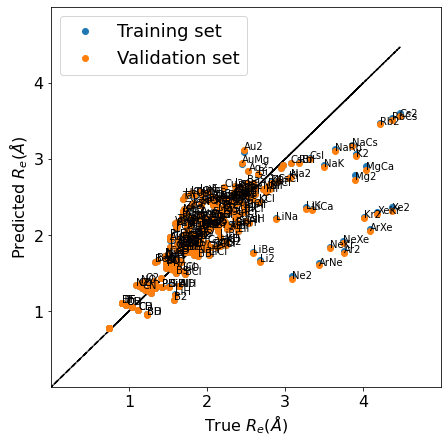

In [16]:
re_train_preds,re_test_preds,out,fig,ax=plot_results(gw_expand,'True $R_e(\AA)$','Predicted $R_e(\AA)$','Re (\AA)',r_y_train_preds,r_y_test_preds);
pyplot.savefig('r_lr_1.svg')
for i in range(len(re_test_preds)):
    if abs(gw_expand['Re (\AA)'].tolist()[i]-re_test_preds[i])<0.1:
        continue
    ax.annotate(gw_expand['Molecule'].tolist()[i], (gw_expand['Re (\AA)'].tolist()[i], re_test_preds[i]))
pyplot.savefig('r_lr_1_annot.svg')

In [17]:
results('$R_e$ LR results with features p1, p2, g1, g2, ln(e1*e2)',gw_expand,'Re (\AA)',re_test_preds,310,MAE,RMSE,R,r"stat_summ.csv")

,"$R_e$ LR results with features p1, p2, g1, g2, ln(e1*e2)"
$r%$,11.327638320191854
MAE,0.2650836526827619
Number of molecules in the whole data set,310
RMSE,0.4223623224066734


In [18]:
split_stat = pd.DataFrame(list(zip(Train_MAE,Train_RMSE,Train_R,MAE,RMSE,R)),columns =['Train_MAE','Train_RMSE','Train_R','MAE','RMSE','R'])
split_stat.to_csv('split_stat.csv')
gw_expand['re_test_preds']=re_test_preds
gw_expand['re_train_preds']=re_test_preds
#re_train_preds,re_train_std
gw_expand.to_csv('gr_expand_pred.csv')